<a href="https://colab.research.google.com/github/shwethashaji-ai/DA_Project/blob/main/itc_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Step 1: Importing necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Step 2: Load the dataset


In [ ]:
df = pd.read_csv("/salaries.csv")
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Machine Learning Scientist,133000,USD,133000,US,50,US,L
1,2025,EN,FT,Data Engineer,45000,GBP,56962,GB,100,GB,L
2,2025,SE,FT,Data Architect,439800,PLN,108058,PL,0,PL,M
3,2025,SE,FT,Data Architect,319200,PLN,78427,PL,0,PL,M
4,2025,MI,FT,Data Engineer,160000,USD,160000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
94429,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
94430,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
94431,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
94432,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


 Step 3: Exploratory Data Analysis (EDA)


In [ ]:
print("Dataset Overview:")
print(df.head())



Dataset Overview:
   work_year experience_level employment_type                   job_title  \
0       2025               MI              FT  Machine Learning Scientist   
1       2025               EN              FT               Data Engineer   
2       2025               SE              FT              Data Architect   
3       2025               SE              FT              Data Architect   
4       2025               MI              FT               Data Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  133000             USD         133000                 US            50   
1   45000             GBP          56962                 GB           100   
2  439800             PLN         108058                 PL             0   
3  319200             PLN          78427                 PL             0   
4  160000             USD         160000                 US             0   

  company_location company_size  
0               US    

In [ ]:
print("\nBasic Information:")
print(df.info())




Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94434 entries, 0 to 94433
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           94434 non-null  int64 
 1   experience_level    94434 non-null  object
 2   employment_type     94434 non-null  object
 3   job_title           94434 non-null  object
 4   salary              94434 non-null  int64 
 5   salary_currency     94434 non-null  object
 6   salary_in_usd       94434 non-null  int64 
 7   employee_residence  94434 non-null  object
 8   remote_ratio        94434 non-null  int64 
 9   company_location    94434 non-null  object
 10  company_size        94434 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.9+ MB
None


In [ ]:
print("\nSummary Statistics:")
print(df.describe())




Summary Statistics:
          work_year        salary  salary_in_usd  remote_ratio
count  94434.000000  9.443400e+04    94434.00000  94434.000000
mean    2024.094532  1.623073e+05   157536.67014     21.452549
std        0.644315  2.212624e+05    73629.46283     40.952963
min     2020.000000  1.400000e+04    15000.00000      0.000000
25%     2024.000000  1.062600e+05   106250.00000      0.000000
50%     2024.000000  1.470000e+05   146200.00000      0.000000
75%     2024.000000  1.990000e+05   198000.00000      0.000000
max     2025.000000  3.040000e+07   800000.00000    100.000000


In [ ]:
print("\nChecking Missing Values:")
print(df.isnull().sum())




Checking Missing Values:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64



Step 4: Handling Missing Values


In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

Step 5: Identifying Duplicates


In [ ]:
print("\nNumber of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)



Number of duplicate rows: 47339


Step 6: Encoding Categorical Variables


In [ ]:
encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = encoder.fit_transform(df[column])


 Step 7: Data Visualization


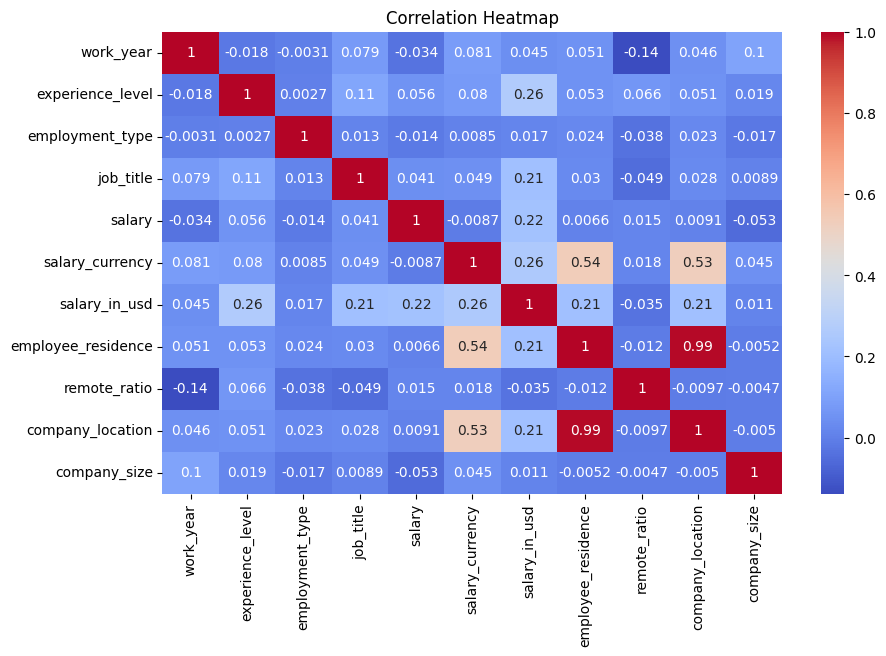

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



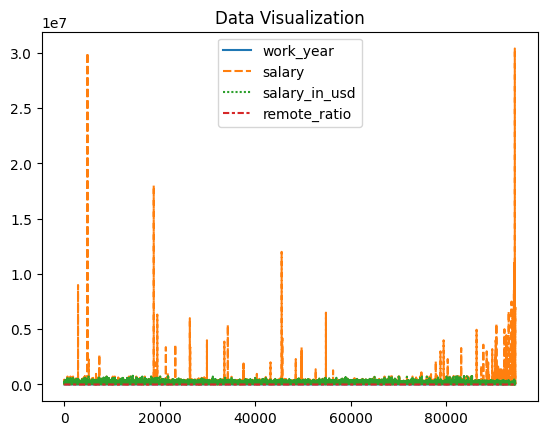

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv("/salaries.csv")
sns.lineplot(data=df)
plt.title("Data Visualization")
plt.show()

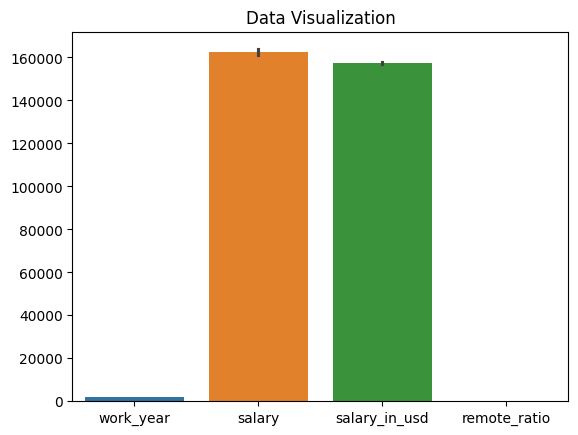

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv("/salaries.csv")
sns.barplot(data=df)
plt.title("Data Visualization")
plt.show()

 Step 8: Outlier Detection using Boxplot


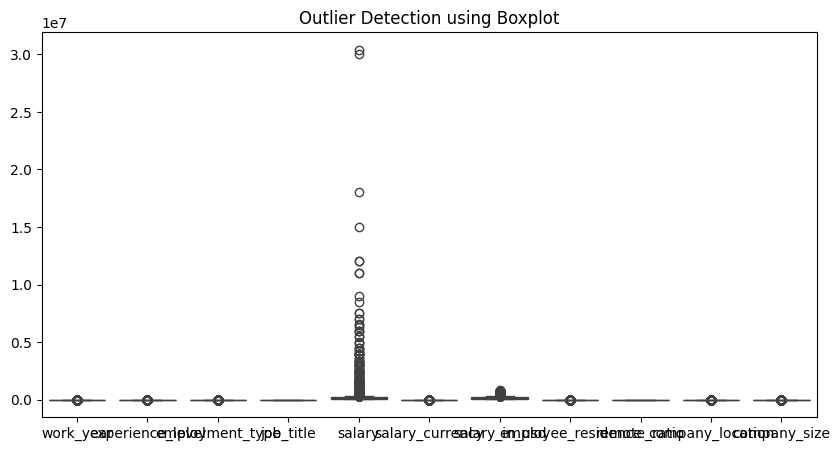

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title("Outlier Detection using Boxplot")
plt.show()

 Step 9: Scaling Numerical Features


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)



 Step 10: Dimensionality Reduction using PCA

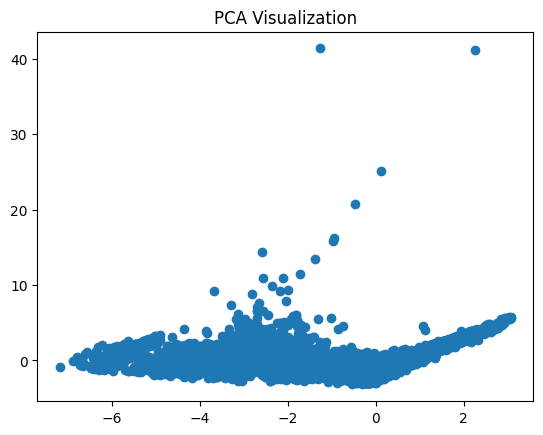

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_features)
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title("PCA Visualization")
plt.show()



 Step 11: Splitting the Data for Model Training


In [ ]:
X = df.drop(columns=['employee_residence'])  # Change 'target' to your actual target column
y = df['company_size']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Step 12: Model Training


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

 Step 13: Model Evaluation

In [ ]:
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       270
           1       1.00      1.00      1.00      9110
           2       1.00      1.00      1.00        39

    accuracy                           1.00      9419
   macro avg       1.00      1.00      1.00      9419
weighted avg       1.00      1.00      1.00      9419



Step 14: Saving the Cleaned Data

In [ ]:
df.to_csv("cleaned_data.csv", index=False)

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,2,2,226,133000,24,133000,89,50,84,0
1,2025,0,2,104,45000,8,56962,32,100,32,0
2,2025,3,2,101,439800,18,108058,69,0,67,1
3,2025,3,2,101,319200,18,78427,69,0,67,1
4,2025,2,2,104,160000,24,160000,89,0,84,1
...,...,...,...,...,...,...,...,...,...,...,...
94429,2020,3,2,152,412000,24,412000,89,100,84,0
94430,2021,2,2,260,151000,24,151000,89,100,84,0
94431,2020,0,2,152,105000,24,105000,89,100,84,2
94432,2020,0,0,59,100000,24,100000,89,100,84,0
